In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Working with GP Priors

In [2]:
x = np.random.rand(200)*10 - 5
x = np.sort(x)

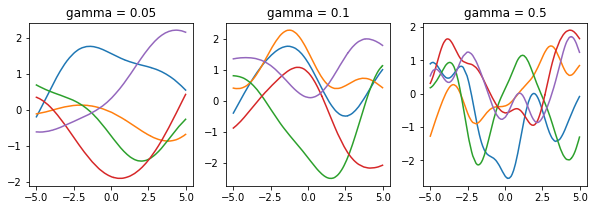

In [3]:
gamvals = [0.05, 0.1, 0.5]
alpha = 1
N = len(x)
idx = 1
plt.subplots(1, 2, figsize=(10, 3))

for gam in gamvals:
    C = np.zeros((N, N))
    for n1 in range(N):
        for n2 in range(N):
            C[n1, n2] = alpha*np.exp(-gam*(x[n1] - x[n2])**2)
    C = C + 1e-6*np.eye(N)
    f = np.random.multivariate_normal(np.zeros(N), C, 5)
    
    plt.subplot(1, 3, idx)
    for i in range(5):
        plt.plot(x, f[i])   
        plt.title('gamma = {}'.format(gam))
    idx += 1
plt.show()